# Titanic: Machine Learning with Statistical Analysis in Python

## Table of Contents

1. [Introduction](#intro)
2. [Data Exploration](#data_exploration)
3. [Feature Engineering](#feature_engineering)
4. [Modeling](#modeling)
5. [Submission](#submission)


## 1. Introduction
<a id='intro'></a>
This kernel consists of three parts. For the first part, Data Exploration, in order to explain the relationship between independent features and dependent features, we will explore the dataset by visualizing and using various statistical methods. This step can give you some insight which features play an important role in prediction. For the second part, Feature Engineering, based on the result of analysis in the first part, we will manipulate and clean the dataset for the next step, modeling. In the last step, we will be working on popular machine learning algorithms (models) for prediction. Lastly, I am excited to share my first kernel with Kagglers and I hope this notebook helpful !    

## 2. Data Exploration
<a id='data_exploration'></a>
-  Visualization
-  Analysis

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('seaborn-colorblind')
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore',category=DeprecationWarning)

from IPython.display import Image
from collections import Counter
from scipy.stats.mstats import normaltest
from sklearn.preprocessing import StandardScaler

In [ ]:
# Before we dive into the main game, let's take a look at the training set.

df = pd.read_csv("../input/train.csv")

In [ ]:
# check the dimension and first five rows of training set

print("Dimension:",df.shape)
df.head()

In [ ]:
# Let's see if there is any missing value in dataset and useful information for further analysis
df.info()
df.isnull().sum()

Age and Cabin features get a large share of the missing values

In [ ]:
df.Age.fillna(df.Age.median(),inplace=True)
df.describe()

In order to analyze without missing values and see the general picture of dataset, it may be a good idea to choose the median over mean to replace missing values in Age column with the median ages since **the median is more robust to outliers.**

##### Sex

In [ ]:
df['Died'] = (df['Survived'] == 0).map(lambda x: 1 if x == True else 0)
df.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar',stacked=True,colors=['red','grey'],figsize=(13,5))
plt.legend(frameon=False)

ax = plt.gca()
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(0)
    
plt.ylabel("Passengers")

In [ ]:
df.groupby('Sex').agg('mean')[['Survived']]

>-  The plots and mean table clearly shows that **female passengers are more likely to survive.**<br>
>-  **Sex variable may be very useful to predict the survival** 

##### Age

In [ ]:
a = sns.factorplot(x='Sex',y='Age',hue='Survived',data=df,split=True,palette={0:"grey",1:'red'},size=6,kind='violin',aspect=2)

Factorplot is used in order to show multiple distributions of three variables 'Sex', 'Age', and 'Survived'.<br>
The plot above validates that,
>-  The shape of the distributions are roughly Gaussian.
>-  Especially, a large number of passengers between 20 to 30 died
>-  **By just looking at the male red plot, we can see that younger male are more likely to survive than old male.**
>-  Unlike old male passengers, a large number of old female passengers could survive.
>-  **Appearently, the age variable does not greatly affect the female survival as much as that of male's**

##### Fare

In [ ]:
print(normaltest(df.Fare))

The p-value of the normal test for Fare is 0, which means we can expect the distribution would be very skewed. (If the p-value is very small, it means it is unlikely that the data came from a normal distribution.)

In [ ]:
fig, (axis1,axis2) = plt.subplots(ncols=2, figsize=(17,6))
gs = gridspec.GridSpec(1,2,width_ratios=[1,3])
ax1 = plt.subplot(gs[0])
sns.kdeplot(df['Fare'],color='red',shade=True,ax=ax1)

ax2 = plt.subplot(gs[1])
ax2.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']],stacked=True,bins=40,color=['red','grey'],label=['Survived','Died'])

plt.xlabel("Fare")
plt.ylabel("passengers")
plt.legend()


>- The plot above shows clearly that **the number of deaths is decreasing as the fare price increases.**
>- We can infer that passengers who could afford **expensive fare tickets are more likely men of high social standing and could be rescued by priority.**

##### SibSp

In [ ]:
plt.figure(figsize=(10,5))
ss = sns.barplot(x='SibSp',y='Survived',data=df,ci=None)
ss = ss.set(ylabel='prob of Survival')

>- **Single passenger or passengers with a few siblings/spouses (<3) aboard the Titanic tend to survive.**
>- **From SibSp2, as the number of SibSp increases, the chance to survive abruptly decreases and even the probability of survival of very large families passengers (5 and 8) is zero.**

##### Parch

In [ ]:
plt.figure(figsize=(10,5))
pc = sns.barplot(x='Parch',y='Survived',data=df,ci=None)
pc = pc.set(ylabel='prob of Survival')


The result is somewhat very similar to that of SibSp.
>- **Large families have less chance to survive.**
>- **Small families have even more chance to survive than single passengers.**

##### Embarked

In [ ]:
# Let's check if there is any null value in the feature.
df.Embarked.isnull().sum()

In [ ]:
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
print(Counter(df.Embarked))

There were two missing values in Embarked so I filled them with the most frequent value 'S'

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Embarked', y='Survived',data=df, ci=None,ax=axis1)
axis2.set(ylabel='prob of Survival')

em = sns.factorplot(x='Embarked',y='Fare',hue='Survived',data=df,kind='violin',palette={0:'grey',1:'red'}, size=6,split=True,ax=axis2)
plt.close(2)

On the left plot, the port which has the highest survival probability among three ports is 'C', Cherbourg but it seems it is still not clear and feels like we do not have enough information ,so we can get a bit more information by plotting one more figure (on the right plot). This plot shows the interactions among 'Embarked', 'Fare', and 'Survived'. One thing to note is that the tail of the 'C' distribution is particularly longer than other two, which means most of expensive fare tickets were sold at the port 'C' Cherbourg; consequently, passengers who can afford to it, as seen earlier in 'Fare' part, are more likely to survive.

##### Pclass

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.barplot(x='Pclass',y='Fare',data=df,ax=axs[0])
ps = sns.barplot(x='Pclass',y='Survived',data=df,ax=axs[1])
ps.set(ylabel='prob of Survival')
sns.despine(ax=axs[1], right=True, left=False)
sns.despine(ax=axs[0], right=True, left=False)


As the ticket class is higher (1st is the highest), Fare is more expensive and they have more chance to survive.

In [ ]:
df[['Fare','Pclass','Survived']].corr()

As we expected, three features are correlated each other and they would be useful to predict survivals. 

##### Family Size

Instead of two seperate features 'Parch' and 'SibSp', we can combine two things in one feature 'Family_Size' and look into the relationship between family size and survivals in detail.

In [ ]:
df['Family_Size'] = df['Parch'] + df['SibSp'] + 1

fs = sns.factorplot(x='Family_Size',y='Survived',kind='bar',data=df,size=7)
fs = fs.set(ylabel='prob of Survival')

It is not surprising that as seen before, small or medium size families have the best chance to survive. One difference between this and the previous analysis (Parch and SibSp) is that single has slightly lower probability of survivals than that of 7 member family. In my opinion, large families were more likely to get noticed by rescue teams than people traveling alone. Nevertheless, in general, large families have less chance to survive.

##### Cabin

In [ ]:
print("number of missing values:",df.Cabin.isnull().sum())
df.Cabin.describe()

In [ ]:
# Extract only the first letter if it is not nan else replace it with 'X'
df['Cabin'].fillna('X',inplace=True)
df['Cabin'] = df['Cabin'].map(lambda x:x[0])

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,5))

# Distribution of cabin locations.
sns.factorplot(x='Cabin',data=df,size=6,kind='count',ci=None, order=['X','A','B','C','D','E','F','G','T'],ax=axis1)

# Survival rate according to cabin locations.
sns.factorplot(x='Cabin',y= 'Survived',data=df,size=6,kind='bar',order=['X','A','B','C','D','E','F','G','T'],ax=axis2)
axis2.set(ylabel='prob of Survival')
plt.close(2)
plt.close(3)

This feature may not be important because there are many missing values; nevertheless, the above plot shows the passengers who have cabin numbers, are more likely to survive than the passengers without them. Perhaps some location of the ship might be safer, sink later than other parts or has easier access to life boats. This can give us a hint of prediction.

##### Ticket

In [ ]:
df['Ticket'] = df['Ticket'].map(lambda x:x.replace('/',''))
df['Ticket'] = df['Ticket'].map(lambda x:x.replace('.',''))
df['Ticket'] = df['Ticket'].map(lambda x: 'XX' if x.isdigit() else x.split(' ')[0])

t = sns.factorplot(x='Ticket',data=df,size=6,kind='count',ci=None)
t = t.set_xticklabels(rotation=90)

source: https://daily.social/this-is-how-you-choose-the-safest-seat-when-travelling-through-these-6-means-of-transport/
![](https://daily.social/wp-content/uploads/2017/08/vehicle_safetyseats_ship.jpg)

We extract meaningful data and replace digits with 'XX' so that it can greatly reduce noise. As mentioned in the cabin section, some location of the ship might be safer, sink later than other parts or has easier access to life boats. In my opinion, any information that provides location of the ship (e.g cabin, ticket number) can be useful to make a prediction of survivals. 

##### Name

Name feature seems to have too many distinct values which can cause overfitting so in order to avoid that, either we remove the feature or refine it for modeling. What we are going to do is extracting the only title part and converting to a binary variable (later in feature engineering part). Title contains social status and sex information which may play an important role in predicting survivals as we pointed out previously. 

In [ ]:
df['Title'] = df['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

In [ ]:
df.Title.unique()

In [ ]:
n = sns.factorplot(kind='count',x='Title',data=df,size=7)
n = n.set_xticklabels(rotation=45)

The distribution of the title shows that most of them are mr, mrs, miss, and master and most of other titles are minor

In [ ]:
pd.crosstab(df['Survived'],df['Title'])

In [ ]:
df['Title'].replace(['Miss','Mlle','Mme','Mrs','Ms'],'Ms',inplace=True)
df['Title'].replace({'Mr':0,'Ms':1,'Master':2},inplace=True)
df['Title'] = df['Title'].map(lambda x:3 if type(x)==str else x)

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,5))

# Distribution of titles.
sns.factorplot(x='Title',kind='count',size=6,data=df,ax=axis1)
axis1.set_xticklabels(['Mr','Ms,Miss,Mme,Mlle,Mrs', 'Master','Minor'])

# Survival rate categorized by titles.
sns.factorplot(x='Title',y='Survived',data=df, kind='bar',size=6,ax=axis2)
axis2.set_xticklabels(['Mr','Ms,Miss,Mme,Mlle,Mrs', 'Master','Minor'])
axis2.set(ylabel='prob of Survival')
plt.close(2)
plt.close(3)

As we can see, women and children (master is used as a title prefixed to the name of a boy not old enough to be callled mr) have high chance to survive and men have the lowest as expected. One thing to note is that Minor is high enough not to ignore.

## 3. Feature Engineering
<a id='feature_engineering'></a>

-  Correlation Check
-  Combining Train & Test Set
-  Feature By Feature

Based on the analysis result, we will manipulate and clean the data in order to run our model efficiently.

### Correlation Check

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df[['Survived','Parch','Fare','Age','SibSp']].corr(),annot=True,linewidth=3,linecolor='yellow')

Except Fare, all the numerical variables in the map are weakly correlated with Survived feature; however, that does not mean that these features are not important or we should get rid of them. The method used for computing the correlation is Pearson method which shows only linear relationship between variables. We still do not know these variables may have some other relationship other than linear so just leave them and let's move on to the next step. 

### Combining Train & Test set

In order to avoid repeating unnecessary codes, for our convenience, let's combine the train and test set.

In [ ]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

y_id = test.iloc[:,0]
y = train.iloc[:,1]

last_train_index = len(train)
first_test_index = len(train)

comb = pd.concat([train,test]).reset_index()
comb.drop(['PassengerId','Survived','index'],inplace=True, axis=1)

print("TrainSet:",train.shape,"TestSet:",test.shape,"CombinedSet:",comb.shape)

### Feature By Feature

##### Embarked

In [ ]:
# Let's see if there is any missing value in Embarked column.
Counter(comb.Embarked)

In [ ]:
# Fill the missing values with the most frequent 'S'.
comb['Embarked'].fillna(comb.Embarked.mode()[0],inplace=True)

# Dummy encoding.
embarked_dummy = pd.get_dummies(comb['Embarked'],prefix='EM')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,embarked_dummy],axis=1)

##### Family Size

In [ ]:
# In this time, create new feature in combined dataset
comb['Family_Size'] = comb['Parch'] + comb['SibSp'] + 1

# Categorize according to the size of family
comb['FS_single'] = comb['Family_Size'].map(lambda x: 1 if x==1 else 0)
comb['FS_small'] = comb['Family_Size'].map(lambda x: 1 if x==2 else 0)
comb['FS_medium'] = comb['Family_Size'].map(lambda x: 1 if 3<=x<=4 else 0)
comb['FS_large'] = comb['Family_Size'].map(lambda x: 1 if x>=5 else 0)


We repeated the exactly samething as we did in analysis part but in this time we added one more step "Categorization" 

##### Sex

In [ ]:
# convert to male:1, female:0
comb['Sex'] = comb.Sex.map(lambda x: 1 if x =='male' else 0)


##### Fare

In [ ]:
print('Missing Age Values :',comb.Fare.isnull().sum())

In [ ]:
comb['Fare'].fillna(comb['Fare'].median(),inplace=True)

##### Pclass

In [ ]:
# Create new dummy variables for each Pclass
pclass_dummy = pd.get_dummies(comb['Pclass'],prefix='PC')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,pclass_dummy],axis=1)

##### Cabin

In [ ]:
print("number of missing values:",comb.Cabin.isnull().sum())
comb.Cabin.describe()

In [ ]:
# If there are any missing values, fill them with 'X'.
comb['Cabin'].fillna('X',inplace=True)

# Extract only the first letter.
comb['Cabin'] = comb['Cabin'].map(lambda x:x[0])

# Create new dummy variables for each refined values.
cabin_dummy = pd.get_dummies(comb['Cabin'],prefix='CB')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,cabin_dummy],axis=1)

##### Ticket

In [ ]:
comb.Ticket.head()

In [ ]:
# If the ticket is only a digit, replace them with XX else extract each prefix.
comb['Ticket'] = comb['Ticket'].map(lambda x:x.replace('/',''))
comb['Ticket'] = comb['Ticket'].map(lambda x:x.replace('.',''))
comb['Ticket'] = comb['Ticket'].map(lambda x: 'XX' if x.isdigit() else x.split(' ')[0])

# Create new dummy variables for each refined values.
ticket_dummy = pd.get_dummies(comb['Ticket'],prefix='TK')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,ticket_dummy],axis=1)

##### Name

In [ ]:
comb['Title'] = comb['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

In [ ]:
Counter(comb['Title'])

In [ ]:
# Convert equivalent female prefixes to Ms
comb['Title'].replace(['Miss','Mlle','Mme','Mrs','Ms'],'Ms',inplace=True)

# Convert titles to numeric values
comb['Title'].replace({'Mr':0,'Ms':1,'Master':2},inplace=True)
comb['Title'] = comb['Title'].map(lambda x:3 if type(x)==str else x)

# Create new dummy variables.
title_dummy = pd.get_dummies(comb['Title'],prefix='TLE')

# Concatenate the combined with dummy variables.
comb = pd.concat([comb,title_dummy],axis=1)

##### Age

In [ ]:
print('Missing Age Values :',comb.Age.isnull().sum())
print('MissingAgeValues / Total :', comb.Age.isnull().sum()/len(comb))

>- There are **263 missing values** in Age column, which consists of **20%** of total number of data; Therefore, simply filling nan values with median of age is not enough. 
>- Instead, **pick the most correlated features with Age** and compute the median age by grouping by chosen features. 

In [ ]:
plt.figure(figsize=(9,6))

# Exclude PassengerID and Survived
col = ['Pclass','Sex','SibSp','Age','Parch','Title']

# Heatmap
a = sns.heatmap(comb[col].corr(),annot=True,linewidth=3,cmap='RdBu_r')

Pclass, SibSp, Parch and Title seem to be correlated with Age. The result makes sense since old passengers tend to have less siblings/spouses and parents (Parch and SibSp) and tend to be financially stable; therefore they pay more on better tickets (Pclass). Needless to say the title is also informative. 

In [ ]:
comb['old_age'] = comb['Age']

comb['Age'] = comb.groupby(['Pclass','SibSp','Parch','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
comb['Age'].fillna(comb['Age'].median(),inplace=True)

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
oa = sns.distplot(comb['old_age'].dropna(),ax=ax1,kde=True,bins=70)
a = sns.distplot(comb['Age'].dropna(),ax=ax2,kde=True,bins=70,color='red')
ax1.set_xlabel('old_Age')
ax1.set_ylabel('Count')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

The left blue plot is the distribution of the age from original dataset after simply omitting missing values and the right red plot is the distribution of the age after filling missing values with the median ages of similar rows. As you can see, the distributions are almost identical.

##### Remove redundant features

In [ ]:
comb.drop(['Cabin','Embarked','Name','Ticket','Title','old_age'],axis=1,inplace=True)

## 4. Modeling
<a id='modeling'></a>
-  Basic Models
-  Tuning Hyperparameters
-  Voting Classifier
-  Learning Curve

In [ ]:
# Split the combined dataset into two: train and test

X_train = comb[:last_train_index]
X_test = comb[first_test_index:]

In [ ]:
# Import the libraries we will be using

from sklearn.model_selection import GridSearchCV,StratifiedKFold,learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Basic Models

I decide to use below algorithms that are widely used in data science community except for Neural Network since it often takes a long time to train and works best with homogeneous data, where all the features have similar meanings.

> - Gradient Boosting
> - AdaBoost
> - Support Vector Machine
> - Random Forest
> - Extra Trees
> - XG Boosting

In [ ]:
kfold = StratifiedKFold(n_splits=20, random_state = 2018)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Tuning Hyperparameters

##### Gradient Boosting

In [ ]:
GBC = GradientBoostingClassifier(random_state = 2018)
gb_param_grid = {
              'n_estimators' : [543],
              'learning_rate': [0.05],
              'max_depth': [4],
              'min_samples_leaf': [3],
              'subsample':[0.4]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGBC.fit(X_train,y)
GBC_best = gsGBC.best_estimator_
print(gsGBC.best_params_)

# cv = 20, random_state = 2018 (Scaler)
# ** {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 543, 'subsample': 0.4}
# {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 540, 'subsample': 0.4} - 80.861

In [ ]:
gsGBC.best_score_

In [ ]:
#y_submission = gsGBC.predict(X_test)

##### AdaBoost

In [ ]:
DTC = DecisionTreeClassifier(random_state = 2018)

adaDTC = AdaBoostClassifier(DTC, random_state = 2018)

ada_param_grid = {"base_estimator__criterion" : ["entropy"],
                  "base_estimator__splitter" :   ["best"],
                  "base_estimator__max_features":[None],
                  "base_estimator__min_samples_split":[0.3],
                  "algorithm" : ["SAMME.R"],
                  "n_estimators" :[1100],
                  "learning_rate":  [0.005]
                 }

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1,verbose = 1)
gsadaDTC.fit(X_train,y)
ada_best = gsadaDTC.best_estimator_
print(gsadaDTC.best_params_)

## cv = 20, random_state = 2018
# * {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_features': None, 'base_estimator__min_samples_split': 0.3, 'base_estimator__splitter': 'best', 'learning_rate': 0.005, 'n_estimators': 1000}
# ** {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__max_features': None, 'base_estimator__min_samples_split': 0.3, 'base_estimator__splitter': 'best', 'learning_rate': 0.005, 'n_estimators': 1100} - 75.119


In [ ]:
gsadaDTC.best_score_

In [ ]:
#y_submission = gsadaDTC.predict(X_test)

##### SVM

In [ ]:
gammas = [0.0019]
Cs = [165]
weight = [{1:1}]
kernels = ['rbf']
param_grid = dict(C=Cs,gamma=gammas,class_weight=weight, kernel=kernels)
gsSVMC = GridSearchCV(SVC(probability=True, random_state = 2018),param_grid=param_grid,cv=kfold,scoring="accuracy",n_jobs=-1,verbose=1)
gsSVMC.fit(X_train,y)
gsSVMC_best = gsSVMC.best_estimator_
print(gsSVMC.best_params_)

## cv = 20, random_state = 2018
# **** {'C': 165, 'class_weight': {1: 1}, 'gamma': 0.0019, 'kernel': 'rbf'} - 77.990
# *** {'C': 170, 'class_weight': {1: 1}, 'gamma': 0.002, 'kernel': 'rbf'} - 77.990
# ** {'C': 150, 'class_weight': {1: 1}, 'gamma': 0.002, 'kernel': 'rbf'} - 77.990

In [ ]:
gsSVMC.best_score_

In [ ]:
#y_submission = gsSVMC.predict(X_test)

##### Random Forest

In [ ]:
RFC = RandomForestClassifier(random_state = 2018)

rf_param_grid = {"max_depth": [7],
              "max_features": [31],
              "min_samples_leaf": [8],
              "n_estimators" :[349]
                }

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsRFC.fit(X_train,y)
RFC_best = gsRFC.best_estimator_
print(gsRFC.best_params_)

# cv = 20, random_state = 2018
# * {'max_depth': 7, 'max_features': 31, 'min_samples_leaf': 8, 'n_estimators': 349} - 80.861


In [ ]:
gsRFC.best_score_

In [ ]:
#y_submission = gsRFC.predict(X_test)

##### Extra Tree

In [ ]:
ExtC = ExtraTreesClassifier(random_state = 2018)

ex_param_grid = {
              "n_estimators" :[311],          
              "max_depth": [6],
              "max_features": ['auto'],
              "min_samples_leaf": [1],
              "bootstrap": [True]
                }

                
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsExtC.fit(X_train,y)
ExtC_best = gsExtC.best_estimator_
print(gsExtC.best_params_)
                
## cv = 20, random_state = 2018
# **{'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 311} - 78.947
# * {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 315} - 78.947


In [ ]:
gsExtC.best_score_

In [ ]:
#y_submission = gsExtC.predict(X_test)

##### XGboost

In [ ]:
XGB = XGBClassifier(random_state = 2018, early_stopping_rounds = 500)

xg_param_grid = {
              'n_estimators' : [465],
              'learning_rate': [0.1],
              
              'max_depth': [11],
              'min_child_weight':[10],
              
              'gamma': [0.1],
              
              'subsample':[0.5],
              'colsample_bytree':[0.6]
}

gsXGB = GridSearchCV(XGB,param_grid = xg_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)
gsXGB.fit(X_train,y)
print(gsXGB.best_params_)

## cv = 20, random_state = 2018
# * {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 10, 'n_estimators': 465, 'subsample': 0.5} - 78.947
# ** {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 465, 'subsample': 0.5} - 78.947


In [ ]:
XGB_best = gsXGB.best_estimator_

In [ ]:
gsXGB.best_score_

In [ ]:
#y_submission = gsXGB.predict(X_test)

### Voting Classifier


This algorithm is simply combining different machine learning classifiers and uses a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels. 
The reason why I chose VotingClassifier as a final model is that among many algorithms, RandomForest, ExtraTrees and XG Boost perform the best so far and they are equally (or at least close to each other) well performing. One of the main advantage or importance of ensemble method is that by combining the models, their individual weaknesses can be balanced out. This leads to yield a better accuracy. As mentioned, such a classifier can be useful when estimators are a set of equally well performing models.

In [ ]:
votingC = VotingClassifier(estimators = [('rfc',RFC_best), ('extc',ExtC_best), ('xgb',XGB_best)
                                        ],weights = [2,1,1], voting='hard',n_jobs=-1)
votingC = votingC.fit(X_train,y)

y_submission = votingC.predict(X_test)


# rfc + extc - 80.861
# W :rfc + extc + xgb - 81.339, weights:[1,1,1] - hard
# WW : rfc + extc + xgb - 81.818 weights:[2,1,1] - hard

In [ ]:
print('Training Score:',votingC.score(X_train,y))

As a result, I could score 81.818% which is top 5% of the competition (Submitted in July 2018).
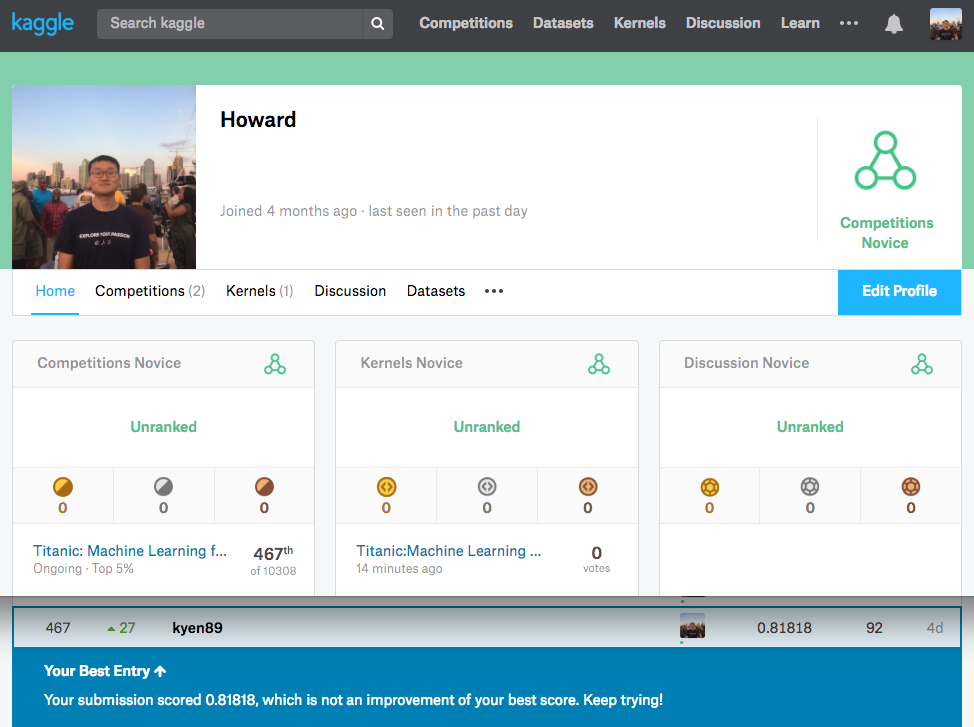

### Learning Curve

A learning curve compares the performace of a model on training and testing data over a varying number of training instances. By plotting learning curves for each model, we can diagnose whether models are overfitted or underfitted

In [ ]:
def lcplot(model,X,y,title,train_sizes=np.linspace(0.1,1.0,5)):
    
    train_sizes, train_scores, test_scores = learning_curve(model,X,y,cv=kfold,n_jobs=-1,train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training size")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color='g')
    plt.plot(train_sizes,train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes,test_scores_mean, 'o-', color='g', label='CV score')
    plt.legend(loc='best')
    return plt

g = lcplot(gsGBC.best_estimator_,X_train,y,"GradientBoost")
g = lcplot(gsadaDTC.best_estimator_,X_train,y,"AdaBoost")
g = lcplot(gsSVMC.best_estimator_,X_train,y,"SVM")
g = lcplot(gsRFC.best_estimator_,X_train,y,"RandomForest")
g = lcplot(gsExtC.best_estimator_,X_train,y,"ExtraTrees")
g = lcplot(gsXGB.best_estimator_,X_train,y,"XGBoost")

Gradient Boost, Ada Boost and not so high as two boostings but SVM are experiencing high varience. As an evidence of high variance, these three algorithms' learning curves are showing huge gaps between training score curves and CV score curves. As the training size is getting more, the gap between two curves are smaller, which means getting more training data is likely to help improving accuracy. On the other hand, Random Forest, Extra Trees and XG Boost have much smaller gaps between two curves and the curves appear to reach a plateau, which means getting more training data will not help much. One more thing to notice is that three algorithms that have smaller gaps match the three best algorithms that I picked.  

## 5. Submission <a id='submission'></a>

In [ ]:
my_submission = pd.DataFrame({'PassengerId':y_id,'Survived':y_submission})
my_submission.to_csv('submission.csv',index=False)  

Thank you for your time and I hope this notebook helpful ! 